In [60]:
import matplotlib.pyplot as plt
import numpy as np

import sys
import os

script_directory = os.path.abspath(os.path.join('..', 'evaluation'))
sys.path.append(script_directory)

from prediction_reader import score_result

In [61]:
def boxplot(data, xlabel, ylabel, xticks):

    plt.figure(figsize=(10, 6))

    boxprops = dict(linestyle='-', linewidth=1, color='lightblue', facecolor='lightblue')
    medianprops = dict(linestyle='--', linewidth=1, color='lightblue')
    meanprops = dict(linestyle='--', linewidth=1, color='slateblue')

    plt.boxplot(data, patch_artist=True, boxprops=boxprops, showmeans=True, meanline=True, medianprops=medianprops, meanprops=meanprops)

    # Calculating means and variances
    # means = [np.mean(d) for d in data]
    # variances = [np.var(d) for d in data]

    # Plot mean points
    # plt.scatter(range(1, len(data) + 1), means, color='orchid', zorder=3, label='Mean')

    # Add variance information as text
    # for i, (mean, var) in enumerate(zip(means, variances), start=1):
    #     plt.text(i, mean, f'var={var:.4f}', ha='center', va='bottom', fontsize=10)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(1,len(data)+1), xticks)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # plt.legend(loc='upper right')

    # Show the plot
    plt.show()

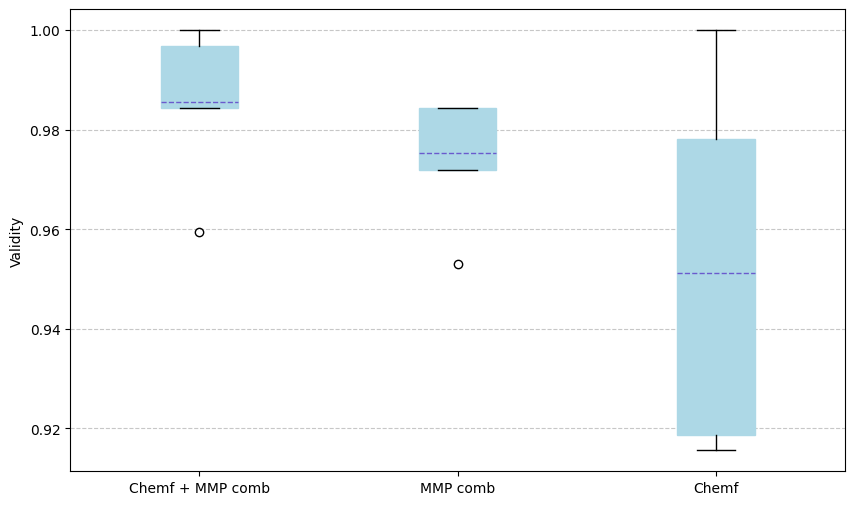

In [62]:
# Sample data (replace with your own lists)
data1 = [0.9875, 0.984375, 0.996875, 0.959375, 1.0]
data2 = [0.984375, 0.971875, 0.984375, 0.953125, 0.9826086956521739]
data3 = [0.94375, 0.915625, 0.91875, 0.978125, 1.0]

# Creating a list of datasets
data = [data1, data2, data3]

xlabel = None
ylabel = 'Validity'
xticks = ['Chemf + MMP comb', 'MMP comb', 'Chemf']
boxplot(data, xlabel, ylabel, xticks)

In [63]:
def multi_boxplot(data, xlabel, ylabel, xticks, labels, location):
    plt.figure(figsize=(9, 5))

    colour_scheme = ['lightblue', 'orange', 'mediumseagreen', 'orchid']
    colour_scheme_dark = ['slateblue', 'darkred', 'darkgreen', 'darkmagenta']

    # Set the width of each box
    box_width = 0.2

    for i in range(len(data)):
        boxprops = dict(linestyle='-', linewidth=1, color=colour_scheme[i], facecolor=colour_scheme[i])
        medianprops = dict(linestyle='--', linewidth=1, color=colour_scheme[i])
        meanprops = dict(linestyle='--', linewidth=1, color=colour_scheme_dark[i])

        plt.boxplot(data[i], positions=np.arange(len(data[i])) + i * box_width, widths=box_width, patch_artist=True,
                    boxprops=boxprops, showmeans=True, meanline=True, medianprops=medianprops, meanprops=meanprops, label=labels[i])
    

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    central_positions = np.arange(len(data[0])) + (len(data) * box_width / 2) - (box_width / 2)
    plt.xticks(central_positions, xticks)

    # plt.ylim(-0.005, 0.2)
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    if location is not None:
        plt.legend(loc=location)
    
    plt.show()


In [64]:
recall_comb, precision_comb, score1_comb, score_all_comb = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/result/result_chemf_mmp_comb.csv', 10, 0, 5, False)
recall_aug, precision_aug, score1_aug, score_all_aug = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/result/result_chemf_mmp_aug.csv', 10, 0, 5, False)
recall_base, precision_base, score1_base, score_all_base = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/result/result_chemf_mmp_base.csv', 10, 0, 5, False)
recall_mask, precision_mask, score1_mask, score_all_mask = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/result/result_chemf_mmp_mask.csv', 10, 0, 5, False)

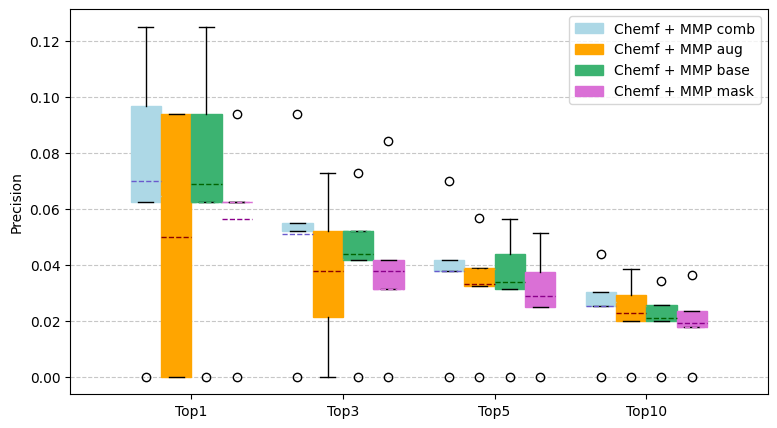

In [65]:
data = [precision_comb, precision_aug, precision_base, precision_mask]

xlabel = None
ylabel = 'Precision'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']
labels = ['Chemf + MMP comb', 'Chemf + MMP aug', 'Chemf + MMP base', 'Chemf + MMP mask']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper right')

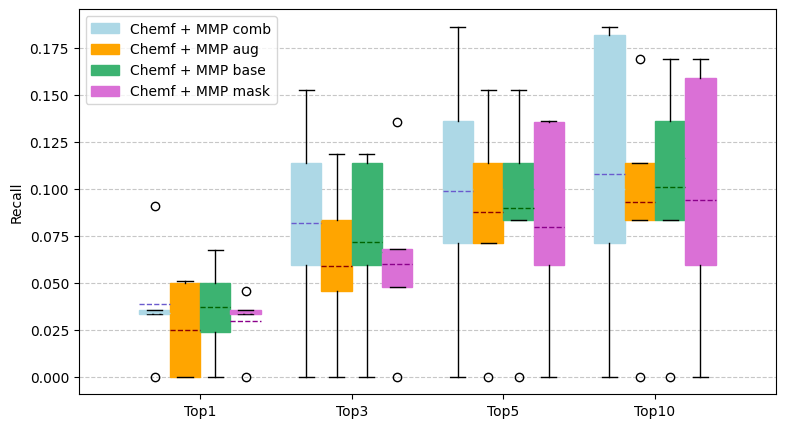

In [66]:
data = [recall_comb, recall_aug, recall_base, recall_mask]

xlabel = None
ylabel = 'Recall'
xticks = ['Top1', 'Top3', 'Top5', 'Top10']
labels = ['Chemf + MMP comb', 'Chemf + MMP aug', 'Chemf + MMP base', 'Chemf + MMP mask']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left')

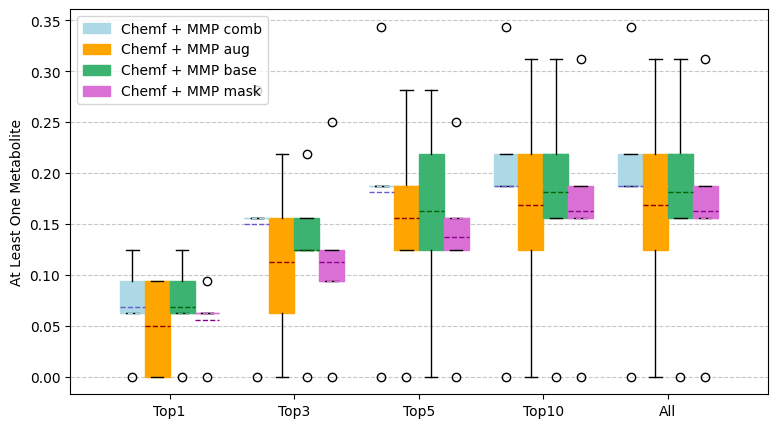

In [67]:
data = [score1_comb, score1_aug, score1_base, score1_mask]

xlabel = None
ylabel = 'At Least One Metabolite'
xticks = ['Top1', 'Top3', 'Top5', 'Top10', 'All']
labels = ['Chemf + MMP comb', 'Chemf + MMP aug', 'Chemf + MMP base', 'Chemf + MMP mask']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left')

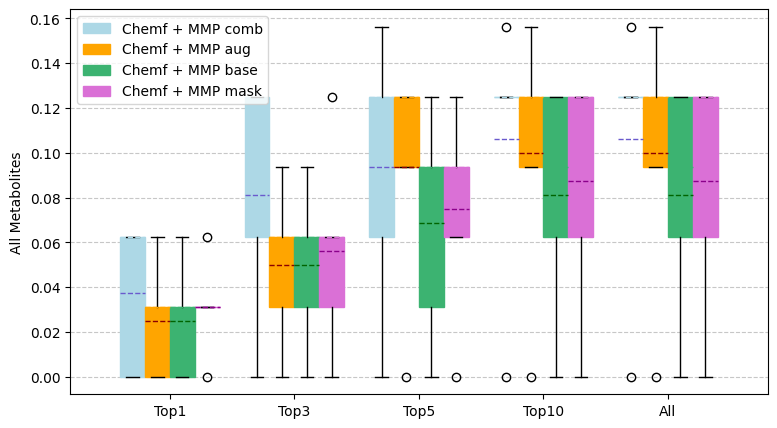

In [68]:
data = [score_all_comb, score_all_aug, score_all_base, score_all_mask]

xlabel = None
ylabel = 'All Metabolites'
xticks = ['Top1', 'Top3', 'Top5', 'Top10', 'All']
labels = ['Chemf + MMP comb', 'Chemf + MMP aug', 'Chemf + MMP base', 'Chemf + MMP mask']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left')

In [69]:
_, _, bs32_one, bs32_all = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/result/result_version44_chemf_mmp_comb_0.5.csv', 10, 0, 5, False)
_, _, bs38_one, bs38_all = score_result('/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/evaluation/result/result_version44_chemf_mmp_comb_0.5_2.csv', 10, 0, 4, False)

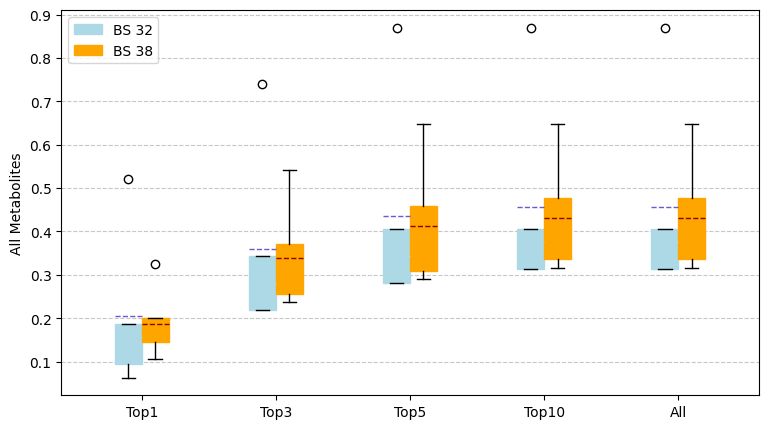

In [70]:
data = [bs32_all, bs38_all]

xlabel = None
ylabel = 'All Metabolites'
xticks = ['Top1', 'Top3', 'Top5', 'Top10', 'All']
labels = ['BS 32', 'BS 38', 'Chemf + MMP base', 'Chemf + MMP mask']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left')

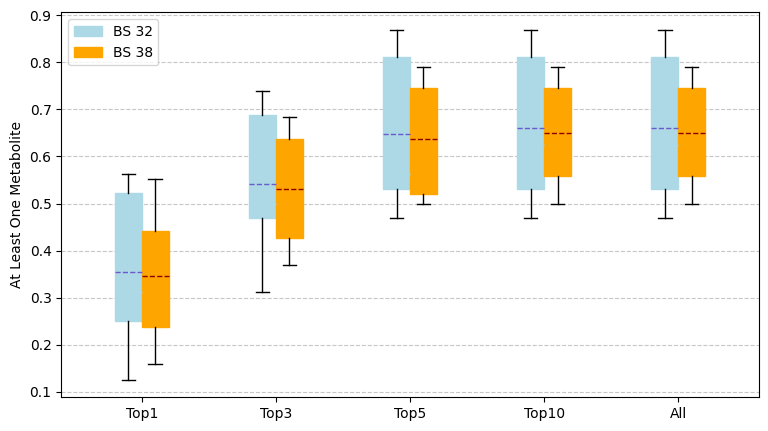

In [71]:
data = [bs32_one, bs38_one]

xlabel = None
ylabel = 'At Least One Metabolite'
xticks = ['Top1', 'Top3', 'Top5', 'Top10', 'All']
labels = ['BS 32', 'BS 38', 'Chemf + MMP base', 'Chemf + MMP mask']

multi_boxplot(data, xlabel, ylabel, xticks, labels, 'upper left')